Liste des générateurs :
- Park & Miller / Standard Minimal
- Mitchell et Moore (fibo)
- bbs (blum blum shub)
- Mersenne Twister (déjà codé lib random python)

#### Import des bibliothèqes :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import kurtosis, skew
from math import ceil, gcd
import random

#### Fonctions utilitaires :

In [2]:
def get_percentile(values, percentage: float) -> float:
        sorted_list = sorted(values)
        return sorted_list[ceil(len(values) * (percentage / 100))]
    
def test_generator(l):
    df = pd.DataFrame(l)
    print(f'Quartile 25% = {get_percentile(l, 25)}')
    print(f'Mean value = {get_percentile(l, 50)}')
    print(f'Quartile 75% = {get_percentile(l, 75)}')
    print(f'Variance = {np.var(l)}')
    print(f'Kurtosis (normalised) = {kurtosis(l)}')
    print(f'Skewness = {skew(l)}')

def get_seed():
    return random.random() * 1_000_000

def LCG(m,a,c, x0, xn):
    res=[x0]
    for i in range(xn):
        x0=(a*x0+c)%m
        res.append(x0)
    return res

def scatter_plot(l1, l2):
    plt.figure()
    plt.scatter(l1, l2, alpha=0.5, s=1)
    plt.show()

# I - Park & Miller / Standard Minimal

xn+1 = 16807 ∗xn mod (231 −1)

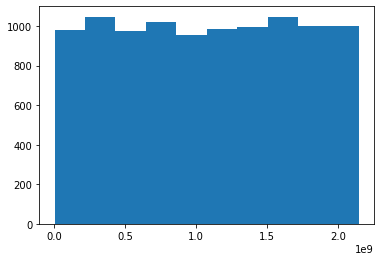

Quartile 25% = 0.2565901841766155
Mean value = 0.5023343241784416
Quartile 75% = 0.7475365224515723
Variance = 0.0820040961793621
Kurtosis (normalised) = -1.1835861452713952
Skewness = -0.00022263552998783115
Quartile 25% = 0.24741601721662676
Mean value = 0.5041080185009001
Quartile 75% = 0.755134227811985
Variance = 0.08472691653138624
Kurtosis (normalised) = -1.2156332460784078
Skewness = -0.011592473166832267


In [3]:
def park_miller_normalized(x0, xn):
    m = pow(2, 31) - 1
    res = LCG(m, 16807, 0, x0, xn)
    return [elem / m for elem in res]

def park_miller(x0, xn):
    m = pow(2, 31) - 1
    return LCG(m, 16807, 0, x0, xn)

l = park_miller(get_seed(), 10_000)

plt.hist(l)
plt.show()

r = np.random.uniform(0,1,10_000)
test_generator(park_miller_normalized(get_seed(), 10_000))
test_generator(r)

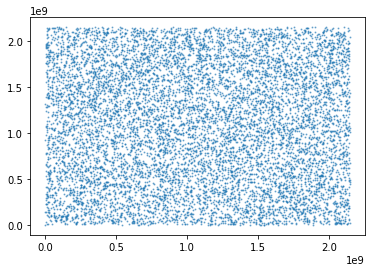

In [4]:
l2 = park_miller(get_seed(), 10_000)
scatter_plot(l, l2)

# II - Mitchell & Moore

In [5]:
def mitchell_moore(xn, m):
    res = park_miller(get_seed(), 56)
    
    for i in range(57, 57 + xn):
        res.append((res[i-24] + res[i - 55]) % m)
    
    return [e / m for e in res[57:]] # normalisation

Quartile 25% = 0.25
Mean value = 0.5
Quartile 75% = 0.75
Variance = 0.083388968302953
Kurtosis (normalised) = -1.20004970490297
Skewness = 0.0002019653185857958


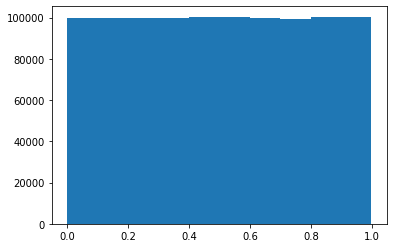

In [6]:
l = mitchell_moore(1_000_000, 1000)

test_generator(l)
#rint(l)
plt.hist(l)
plt.show()

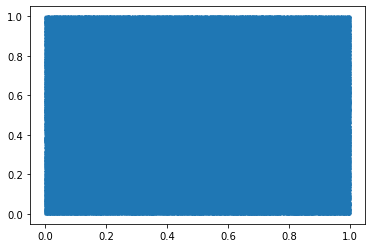

In [7]:
l2 = mitchell_moore(1_000_000, 1000)
scatter_plot(l, l2)

# III - Blum Blum Shub

1


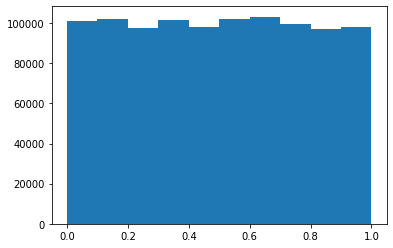

Quartile 25% = 0.2474931470061281
Mean value = 0.4997217238012854
Quartile 75% = 0.7453078430777669
Variance = 0.08321956831566571
Kurtosis (normalised) = -1.1961418505352315
Skewness = 0.00421387938290502


In [8]:
def blum_blum_shub(seed, xn): # intéret --> difficile à hacker
    seed = int(seed)
    m = 56923661
    if (seed == 0 or seed == 1):
        raise ValueError("Seed should not be equal to 0 or 1.")
    print(gcd(m, seed))
    if (gcd(m, seed) != 1):
        raise ValueError(f"Seed should be prime with modulo : {m}")
    
    res = [seed]
    for i in range(xn):
        seed = (seed*seed) % m
        res.append(seed)
    return [e / m for e in res]

l = blum_blum_shub(get_seed(), 1_000_000)

plt.hist(l)
plt.show()

test_generator(l)

1


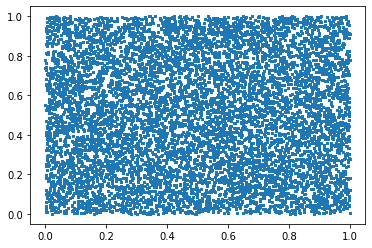

In [9]:
l2 = blum_blum_shub(get_seed(), 1_000_000)
scatter_plot(l, l2)

# IV - Mersenne Twister (intégré à la bibliothèque random en Python)

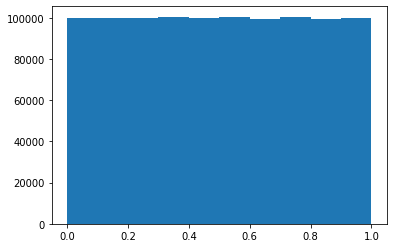

Quartile 25% = 0.24995594984674652
Mean value = 0.4998063567414718
Quartile 75% = 0.7494020306031943
Variance = 0.08324284347549009
Kurtosis (normalised) = -1.1976095756746552
Skewness = 0.0010308542684078854


In [10]:
l = [random.uniform(0, 1) for i in range(1_000_000)]  

plt.hist(l)
plt.show()

test_generator(l)

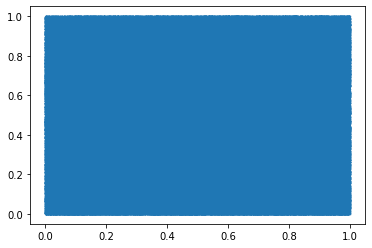

In [11]:
l2 = [random.uniform(0, 1) for i in range(1_000_000)]  
scatter_plot(l, l2)